In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

df = sns.load_dataset('flights')

#df = pd.set_option("display.max_rows", 20)
#pd.set_option("display.max_columns", 20)
pd.options.display.max_rows

%matplotlib inline

In [20]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [22]:
df['date'] = df['month'].astype(str) + ' ' + df['year'].astype(str)
df['ts'] = pd.to_datetime(df['date'])

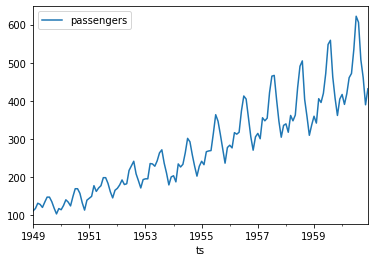

In [24]:
df.plot(x='ts', y='passengers')
None

### diff() removes the trend from the data

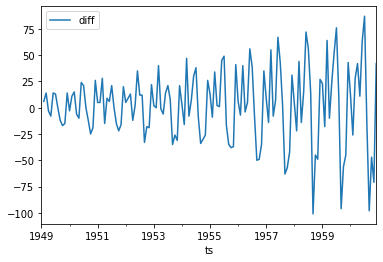

In [25]:
df['diff'] = df['passengers'].diff()
df.plot(x='ts', y='diff')
None

### pct_change() removes trend + volatility (change in variance)

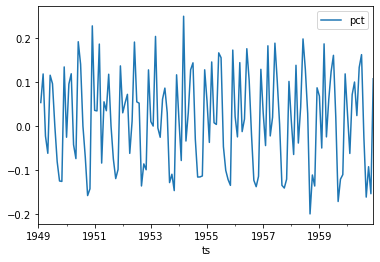

In [26]:
df['pct'] = df['passengers'].pct_change()
df.plot(x='ts', y='pct')
None

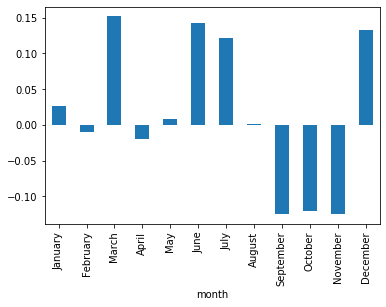

In [27]:
month_avg = df.groupby('month')['pct'].mean()
month_avg.plot.bar()
None

In [28]:
df['pct'].mean()

0.015168535658176796

In [30]:
mmlist = list(month_avg.values) * 12
df['norm_pct'] = df['pct'].values / mmlist

In [40]:
df['norm_pct'].mean()

1.0

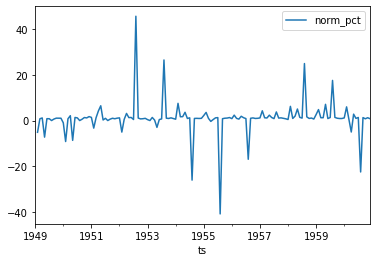

In [31]:
df.plot(x='ts', y='norm_pct')
None

In [32]:
df['norm_pct'].mean()

1.0

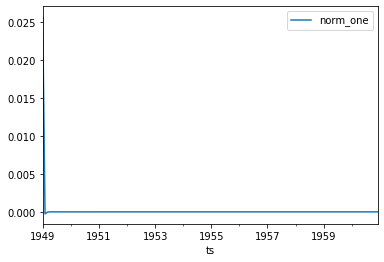

In [41]:
df['norm_one'] = 1.0
df['norm_one'] *= mmlist
df['norm_one'].fillna(112.0, inplace=True) # !!!???
df['norm_one'] = df['norm_one'].cumprod()
df.plot(x='ts', y='norm_one')
None

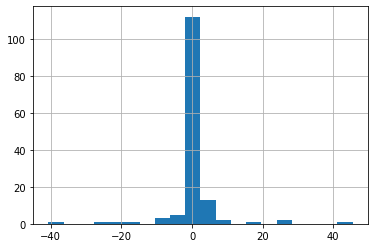

In [42]:
df['norm_pct'].hist(bins=20)
None

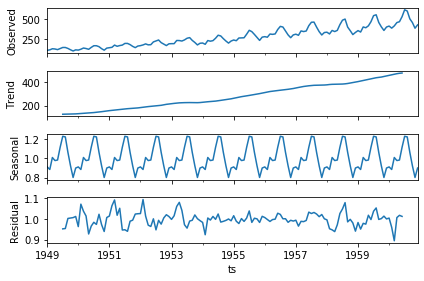

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

sdr = seasonal_decompose(df.set_index('ts')['passengers'], model='multiplicative')
sdr.plot()
None

In [38]:
import random

r = [random.random() for i in range(100)]
d = pd.date_range('2010-01-01', freq='h', periods=100)
s = pd.Series(r, index=d)

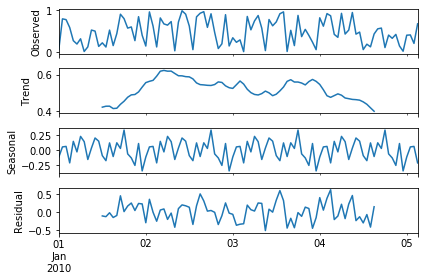

In [37]:
sdr = seasonal_decompose(s, model='additive')
sdr.plot()
None